In [1]:
import pandas as pd

from eoles.utils import get_config, process_heating_need
from eoles.process_cost_efficiency import piecewise_linearization_cost_efficiency
from eoles.model_heat_coupling import ModelEOLES
import logging

from project.model import get_inputs, social_planner  # imports from ResIRF package
import datetime
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# set seaborn style
sns.set_theme()

In [2]:
config = get_config(spec="greenfield")

LOG_FORMATTER = '%(asctime)s : %(name)s  : %(funcName)s : %(levelname)s : %(message)s'
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)
# consoler handler
console_handler = logging.StreamHandler()
console_handler.setFormatter(logging.Formatter(LOG_FORMATTER))
logger.addHandler(console_handler)

In [21]:
dict_cost, dict_heat = social_planner(climate=2006, smooth=True)
dict_heat = process_heating_need(dict_heat, climate=2006)
linearized_renovation_costs, threshold_linearized_renovation_costs = piecewise_linearization_cost_efficiency(dict_cost, number_of_segments=3, plot=False)

2022-11-21 08:17:26,259 - 3050 - log_ - INFO - Creating AgentBuildings object
2022-11-21 08:17:26,259 - 3050 - log_ - INFO - Creating AgentBuildings object
2022-11-21 08:17:26,259 - 3050 - log_ - INFO - Creating AgentBuildings object
2022-11-21 08:17:26,259 - 3050 - log_ - INFO - Creating AgentBuildings object


In [22]:
dict_heat["global"].sum()*1e-6

269454.87215829035

In [17]:
linearized_renovation_costs["global_0"]

328.46264968775523

In [13]:
threshold_linearized_renovation_costs

global_0    0.463849
global_1    0.202288
global_2    0.072437
dtype: float64

In [17]:
dict_heat["global"]

0       7.969718e+07
1       8.880543e+07
2       9.335955e+07
3       9.563661e+07
4       1.047449e+08
            ...     
8755    8.007953e+07
8756    7.226689e+07
8757    6.640741e+07
8758    6.445425e+07
8759    8.203269e+07
Length: 8760, dtype: float64

<AxesSubplot:>

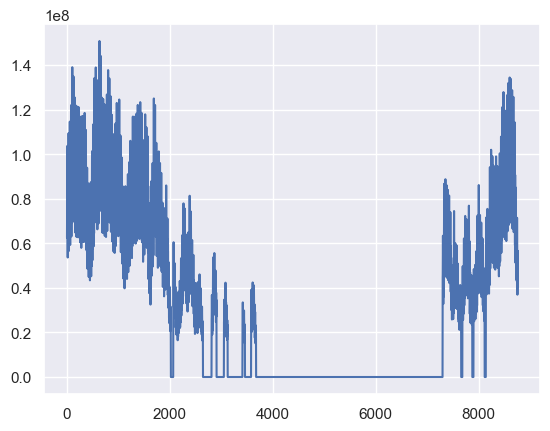

In [20]:
sns.lineplot(dict_heat["global"])

<AxesSubplot:>

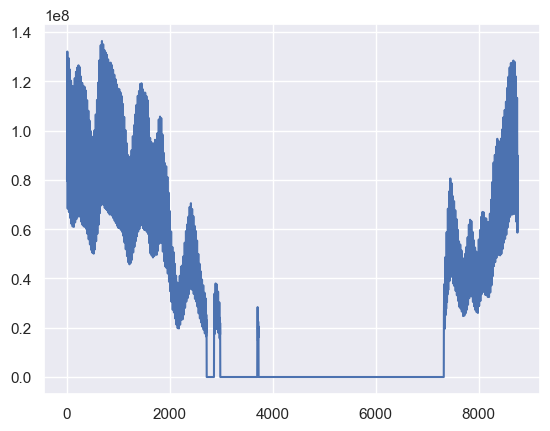

In [23]:
sns.lineplot(dict_heat["global"])

In [ ]:
# Automize saving piecewise approximation
cost_efficiency_stock = pd.read_csv("inputs/cost_efficiency_stock.csv", index_col=0)
dict_cost_efficiency_archetype = {
    "all_stock": cost_efficiency_stock
}

linearized_renovation_costs, threshold_linearized_renovation_costs = piecewise_linearization_cost_efficiency(dict_cost_efficiency_archetype, number_of_segments=3)

In [26]:
m_scc.renovation_annuities

0
all_stock_0     20307.578158
all_stock_1     77148.811983
all_stock_2    174473.977434
Name: 1, dtype: float64

In [38]:
20000*0.4

8000.0

In [39]:
112*40

4480

In [27]:
m_scc.annuities

0
offshore_f          112.544657
offshore_g           77.004239
onshore              72.494203
onshore_V110         57.738746
pv_g                 29.942651
pv_g_ns              29.942651
pv_c                 42.497221
river               150.385051
lake                 49.287543
nuc                 316.164019
ocgt                 38.492497
ccgt                 53.310627
phs                  59.710532
electrolysis         37.268830
hydrogen             24.387790
h2_ccgt              65.157433
biogas1              31.004149
biogas2              31.004149
battery1             29.990794
battery4             17.613641
methane               0.000000
methanation          58.656498
pyrogazification    209.487493
natural_gas           0.000000
heat_pump            82.536150
resistive             7.860586
gas_boiler           13.756025
fuel_boiler          13.756025
wood_boiler          13.756025
Name: 1, dtype: float64

In [28]:
m_scc.linearized_renovation_costs

0
all_stock_0     316.543423
all_stock_1    1202.553493
all_stock_2    2719.604950
Name: 1, dtype: float64

In [42]:
[e for e in m_scc.model.renovation_rate]

['all_stock_0', 'all_stock_1', 'all_stock_2']

In [33]:
m_scc.miscellaneous["discount_rate"] * m_scc.linearized_renovation_costs["all_stock_0"] * 1e3 * (
                m_scc.miscellaneous["discount_rate"] * m_scc.miscellaneous["construction_time_renov"] + 1) / (
                                             1 - (1 + m_scc.miscellaneous["discount_rate"]) ** (
                                         -m_scc.miscellaneous["lifetime_renov"]))

20307.578157949436

In [46]:
m_scc.energy_capacity

phs          135.500000
battery1       0.000000
battery4       0.000000
hydrogen    3713.290236
methane     9347.147621
dtype: float64

In [60]:
m_scc.summary["methane"]

36.34008855576088

In [61]:
m_scc.hourly_generation

,hour,demand,offshore_f,offshore_g,onshore,pv_g,pv_c,river,lake,biogas1,...,phs_in,battery1_in,battery4_in,hydrogen_in,methane_in,phs_charge,battery1_charge,battery4_charge,hydrogen_charge,methane_charge
0,0,69.712739,43.0675,17.302857,29.494368,0.0,0.0,3.596547,0.0,19.481378,...,0.000000,0.0,0.0,2.263481,40.816902,128.069218,0.0,0.0,2784.860650,4726.020262
1,1,65.166886,44.4590,17.600000,30.428612,0.0,0.0,3.358771,0.0,19.481378,...,0.000000,0.0,0.0,2.263481,40.816902,123.474639,0.0,0.0,2787.124131,4766.837164
2,2,59.364789,44.9880,17.600000,31.008639,0.0,0.0,3.228667,0.0,19.481378,...,0.000000,0.0,0.0,2.263481,40.816902,123.474639,0.0,0.0,2789.387612,4807.654066
3,3,56.803051,44.9765,17.468571,31.216013,0.0,0.0,3.097816,0.0,19.481378,...,0.000000,0.0,0.0,2.263481,40.816902,123.474639,0.0,0.0,2791.651092,4848.470968
4,4,53.313940,44.4820,17.040000,31.052691,0.0,0.0,2.948271,0.0,19.481378,...,0.000000,0.0,0.0,2.263481,36.273408,123.474639,0.0,0.0,2793.914573,4889.287870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,8755,71.801487,36.7310,19.580000,47.024622,0.0,0.0,2.198305,0.0,19.481378,...,2.255823,0.0,0.0,2.263481,40.816902,109.973947,0.0,0.0,2773.543247,4521.935752
8756,8756,75.025726,36.8000,19.731429,47.236906,0.0,0.0,1.815471,0.0,19.481378,...,4.462508,0.0,0.0,2.263481,40.816902,112.004188,0.0,0.0,2775.806728,4562.752654
8757,8757,74.135638,36.5700,19.805714,47.619553,0.0,0.0,1.517877,0.0,19.481378,...,4.462508,0.0,0.0,2.263481,40.816902,116.020445,0.0,0.0,2778.070208,4603.569556
8758,8758,70.753361,36.1675,19.820000,47.565578,0.0,0.0,1.437871,0.0,19.481378,...,4.462508,0.0,0.0,2.263481,40.816902,120.036703,0.0,0.0,2780.333689,4644.386458


<AxesSubplot:ylabel='methane'>

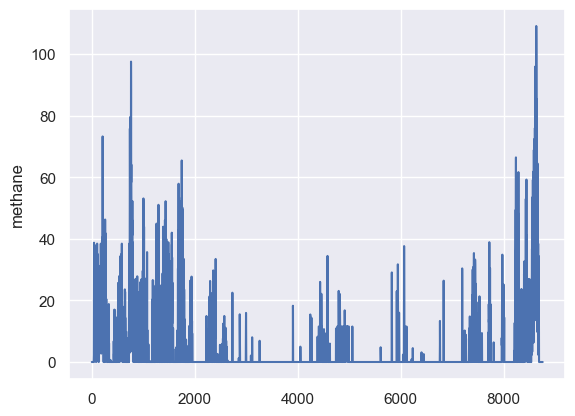

In [58]:
sns.lineplot(m_scc.hourly_generation["methane"])

In [5]:
list_scc = [0, 100, 200, 300, 400, 500]
list_social_cost = []
list_technical_cost = []
list_emissions = []
list_primary_production = []
list_heat_generation = []
renovation_rate_df = pd.DataFrame()
reindex_primary_prod = ["offshore_f", "offshore_g", "onshore", "pv_g", "pv_c", "river", "lake", "nuc", "biogas1", "biogas2", "pyrogazification", "natural_gas"]
reindex_heat_prod = ["resistive", "heat_pump", "gas_boiler", "fuel_boiler", "wood_boiler"]

# TODO: a changer, j'utilise cela pour l'instant comme proxy
dict_heat = {"all_stock": dict_heat["global"]* 1e-6}

for scc in list_scc:
    print(f"Social cost of carbon: {scc}")
    m_scc = ModelEOLES(name="test", config=config, path="eoles/outputs", logger=logger, nb_years=1, heating_demand=dict_heat, nb_linearize=3,
                       linearized_renovation_costs=linearized_renovation_costs, threshold_linearized_renovation_costs=threshold_linearized_renovation_costs,
                       social_cost_of_carbon=scc, year=2050)
    m_scc.build_model()
    solver_results, status, termination_condition = m_scc.solve(solver_name="gurobi")

    list_social_cost.append(m_scc.objective)
    list_technical_cost.append(m_scc.technical_cost)
    list_emissions.append(m_scc.emissions)

    list_primary_production.append(m_scc.primary_generation.reindex(reindex_primary_prod).to_list())
    list_heat_generation.append(m_scc.heat_generation.reindex(reindex_heat_prod).to_list())
    renovation_rate_df = pd.concat([renovation_rate_df, m_scc.renovation_rates.to_frame().transpose()], axis=0, ignore_index=True)

Social cost of carbon: 0


2022-11-18 18:34:22,038 : __main__  : solve : INFO : Solving EOLES model using gurobi
2022-11-18 18:35:02,589 : __main__  : solve : INFO : Optimization successful
/Users/celia/Documents/These/python_projects/eoles2/eoles/model_heat_coupling.py:801: RuntimeWarning: invalid value encountered in double_scalars
  lcoe_CH4_volume = (costs_elec_to_CH4 + costs_CH4_to_demand) / CH4_demand_tot  # € / MWh
/Users/celia/Documents/These/python_projects/eoles2/eoles/model_heat_coupling.py:845: RuntimeWarning: invalid value encountered in double_scalars
  lcoe_CH4_value = (costs_elec_to_CH4_value + costs_CH4_to_demand_value) / CH4_demand_tot  # € / MWh


Social cost of carbon: 100


2022-11-18 18:35:17,047 : __main__  : solve : INFO : Solving EOLES model using gurobi
2022-11-18 18:36:09,124 : __main__  : solve : INFO : Optimization successful
/Users/celia/Documents/These/python_projects/eoles2/eoles/model_heat_coupling.py:801: RuntimeWarning: invalid value encountered in double_scalars
  lcoe_CH4_volume = (costs_elec_to_CH4 + costs_CH4_to_demand) / CH4_demand_tot  # € / MWh
/Users/celia/Documents/These/python_projects/eoles2/eoles/model_heat_coupling.py:845: RuntimeWarning: invalid value encountered in double_scalars
  lcoe_CH4_value = (costs_elec_to_CH4_value + costs_CH4_to_demand_value) / CH4_demand_tot  # € / MWh


Social cost of carbon: 200


2022-11-18 18:36:23,760 : __main__  : solve : INFO : Solving EOLES model using gurobi
2022-11-18 18:37:00,745 : __main__  : solve : INFO : Optimization successful
/Users/celia/Documents/These/python_projects/eoles2/eoles/model_heat_coupling.py:801: RuntimeWarning: divide by zero encountered in double_scalars
  lcoe_CH4_volume = (costs_elec_to_CH4 + costs_CH4_to_demand) / CH4_demand_tot  # € / MWh
/Users/celia/Documents/These/python_projects/eoles2/eoles/model_heat_coupling.py:845: RuntimeWarning: divide by zero encountered in double_scalars
  lcoe_CH4_value = (costs_elec_to_CH4_value + costs_CH4_to_demand_value) / CH4_demand_tot  # € / MWh


Social cost of carbon: 300


2022-11-18 18:37:15,362 : __main__  : solve : INFO : Solving EOLES model using gurobi
2022-11-18 18:37:52,785 : __main__  : solve : INFO : Optimization successful
/Users/celia/Documents/These/python_projects/eoles2/eoles/model_heat_coupling.py:801: RuntimeWarning: divide by zero encountered in double_scalars
  lcoe_CH4_volume = (costs_elec_to_CH4 + costs_CH4_to_demand) / CH4_demand_tot  # € / MWh
/Users/celia/Documents/These/python_projects/eoles2/eoles/model_heat_coupling.py:845: RuntimeWarning: divide by zero encountered in double_scalars
  lcoe_CH4_value = (costs_elec_to_CH4_value + costs_CH4_to_demand_value) / CH4_demand_tot  # € / MWh


Social cost of carbon: 400


2022-11-18 18:38:07,425 : __main__  : solve : INFO : Solving EOLES model using gurobi
2022-11-18 18:38:46,981 : __main__  : solve : INFO : Optimization successful
/Users/celia/Documents/These/python_projects/eoles2/eoles/model_heat_coupling.py:801: RuntimeWarning: divide by zero encountered in double_scalars
  lcoe_CH4_volume = (costs_elec_to_CH4 + costs_CH4_to_demand) / CH4_demand_tot  # € / MWh
/Users/celia/Documents/These/python_projects/eoles2/eoles/model_heat_coupling.py:845: RuntimeWarning: divide by zero encountered in double_scalars
  lcoe_CH4_value = (costs_elec_to_CH4_value + costs_CH4_to_demand_value) / CH4_demand_tot  # € / MWh


Social cost of carbon: 500


2022-11-18 18:39:01,621 : __main__  : solve : INFO : Solving EOLES model using gurobi
2022-11-18 18:39:46,732 : __main__  : solve : INFO : Optimization successful
/Users/celia/Documents/These/python_projects/eoles2/eoles/model_heat_coupling.py:801: RuntimeWarning: divide by zero encountered in double_scalars
  lcoe_CH4_volume = (costs_elec_to_CH4 + costs_CH4_to_demand) / CH4_demand_tot  # € / MWh
/Users/celia/Documents/These/python_projects/eoles2/eoles/model_heat_coupling.py:845: RuntimeWarning: divide by zero encountered in double_scalars
  lcoe_CH4_value = (costs_elec_to_CH4_value + costs_CH4_to_demand_value) / CH4_demand_tot  # € / MWh


In [6]:
m_scc.objective

47.68017488451914

In [10]:
m_scc.heat_demand["all_stock"].sum()

277858.3810600422

In [8]:
list_social_cost

[2534664.193177706]

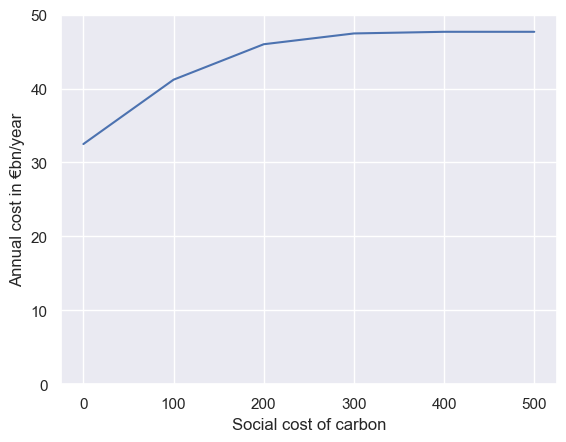

In [7]:

plt.plot(list_scc, list_social_cost)
plt.ylim(0, 50)
plt.ylabel("Annual cost in €bn/year")
plt.xlabel("Social cost of carbon")
plt.show()

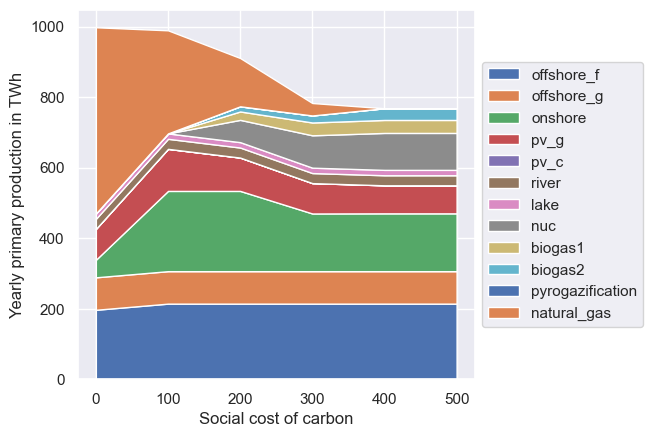

In [8]:
list_primary_production = np.transpose(np.array(list_primary_production)).tolist()

fig = plt.figure()
ax = plt.subplot(111)
ax.stackplot(list_scc, list_primary_production, labels=reindex_primary_prod)
ax.set_ylabel("Yearly primary production in TWh")
ax.set_xlabel("Social cost of carbon")
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

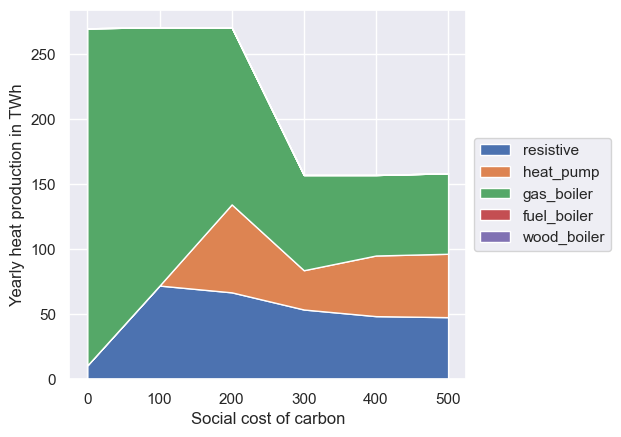

In [9]:
list_heat_generation = np.transpose(np.array(list_heat_generation)).tolist()

fig = plt.figure()
ax = plt.subplot(111)
ax.stackplot(list_scc, list_heat_generation, labels = reindex_heat_prod)
ax.set_ylabel("Yearly heat production in TWh")
ax.set_xlabel("Social cost of carbon")
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

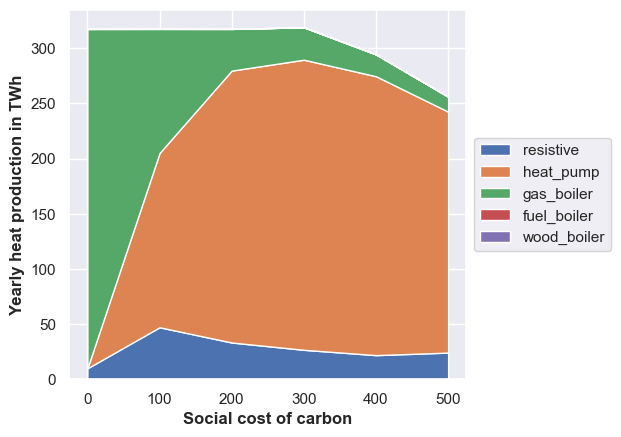

In [46]:
list_heat_generation = np.transpose(np.array(list_heat_generation)).tolist()

fig = plt.figure()
ax = plt.subplot(111)
ax.stackplot(list_scc, list_heat_generation, labels = reindex_heat_prod)
ax.set_ylabel("Yearly heat production in TWh")
ax.set_xlabel("Social cost of carbon")
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [10]:
renovation_rate_df.index = list_scc
renovation_rate_df = renovation_rate_df.stack().reset_index().rename(columns={"level_0": "scc", "level_1": "archetype", 0: "renovation_rate"})
renovation_rate_df

,scc,archetype,renovation_rate
0,0,all_stock,0.000000
1,100,all_stock,0.000000
2,200,all_stock,0.000000
3,300,all_stock,0.418781
4,400,all_stock,0.418781
5,500,all_stock,0.418781


<AxesSubplot:xlabel='scc', ylabel='renovation_rate'>

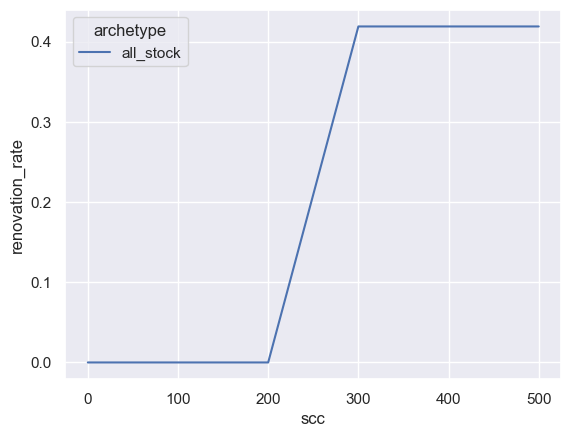

In [11]:
sns.lineplot(renovation_rate_df, x="scc", y="renovation_rate", hue="archetype")

<AxesSubplot:xlabel='scc', ylabel='renovation_rate'>

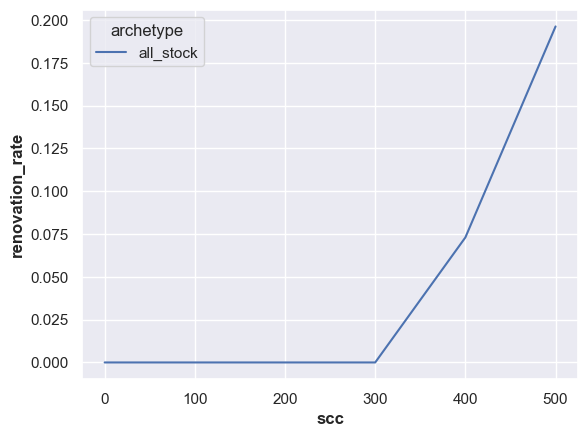

In [48]:
sns.lineplot(renovation_rate_df, x="scc", y="renovation_rate", hue="archetype")